In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [2]:
# Load data
stocks_data = pd.read_csv("../data/final_tech_stock_data.csv", parse_dates=["Date"])

# Get sample ticker: AAPL
aapl_data = stocks_data[stocks_data["Ticker"] == "AAPL"]

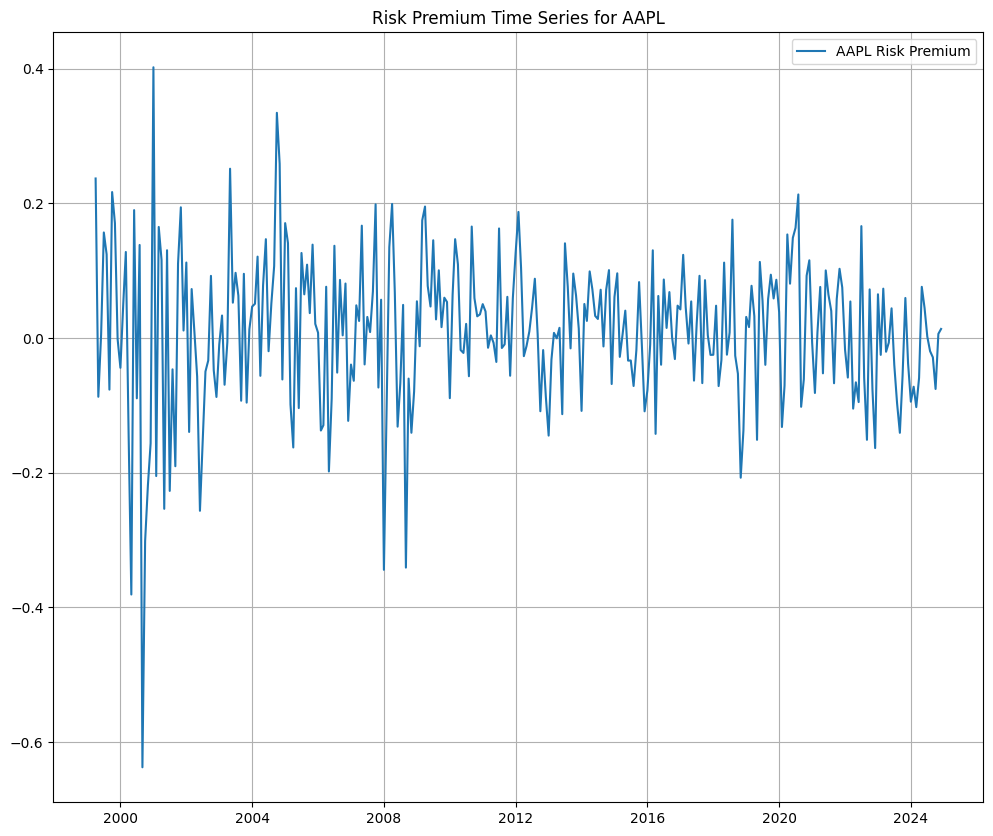

In [3]:
# Time series plot for AAPL
plt.figure(figsize=(12, 10))
plt.plot(aapl_data["Date"], aapl_data["Risk_Premium"], label='AAPL Risk Premium')
plt.title("Risk Premium Time Series for AAPL")
plt.legend()
plt.grid()
plt.show()

In [4]:
# Define a function for ADF test
def adf_test(series, ticker, col_name):
    result = adfuller(series.dropna(), autolag="AIC")
    print(f"\nADF Test for {col_name} ({ticker}):")
    print(f"Test Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    print('---\n')
    print("Stationary" if result[1] < 0.05 else "Non-Stationary")

# Apply ADF test for AAPL Risk Premium
adf_test(aapl_data["Risk_Premium"], "AAPL", "Risk Premium")


ADF Test for Risk Premium (AAPL):
Test Statistic: -6.0932
p-value: 0.0000
Critical Value (1%): -3.4521902441030963
Critical Value (5%): -2.871158406898617
Critical Value (10%): -2.5718948388228586
---

Stationary


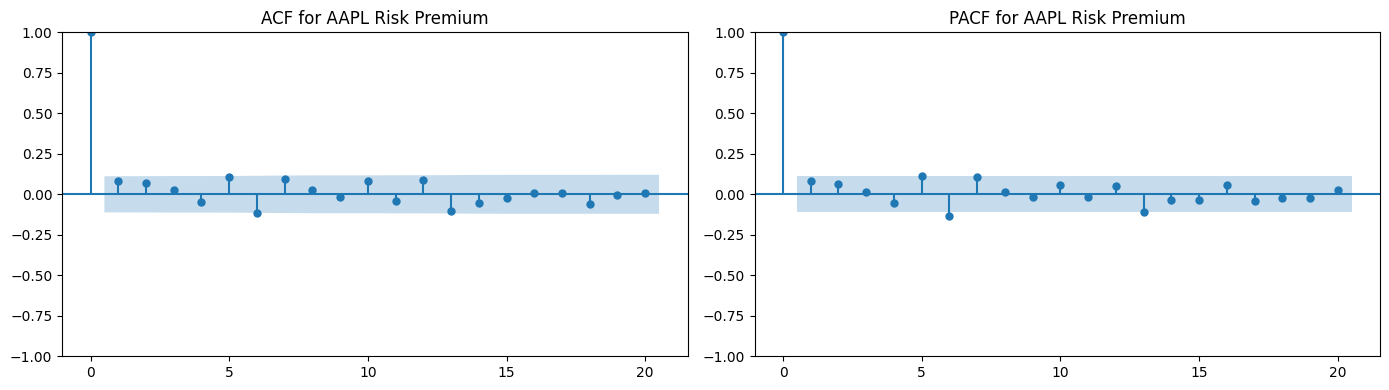

In [5]:
# --- AUTOCORRELATION AND PARTIAL AUTOCORRELATION ---
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots for ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot ACF
plot_acf(aapl_data['Risk_Premium'], lags=20, ax=axes[0], alpha=0.05)
axes[0].set_title(f'ACF for AAPL Risk Premium')

# Plot PACF
plot_pacf(aapl_data['Risk_Premium'], lags=20, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title(f'PACF for AAPL Risk Premium')

plt.tight_layout()
plt.show()